In [1]:
# ChainEats Analytics - Day 5: Business Visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for professional charts
plt.style.use('default')
sns.set_palette("husl")

print("ChainEats Data Visualization - Day 5")
print("=" * 50)

# Load data
print("Loading analysis results...")
city_performance = pd.read_csv('city_performance.csv')
seasonal_performance = pd.read_csv('seasonal_performance.csv')
top_locations = pd.read_csv('top_locations.csv')
menu_mix = pd.read_csv('menu_mix_analysis.csv')
weather_impact = pd.read_csv('weather_impact.csv')
cost_analysis = pd.read_csv('cost_optimization.csv')

print("Data loaded successfully!")

ChainEats Data Visualization - Day 5
Loading analysis results...
Data loaded successfully!



Creating City Performance Chart...


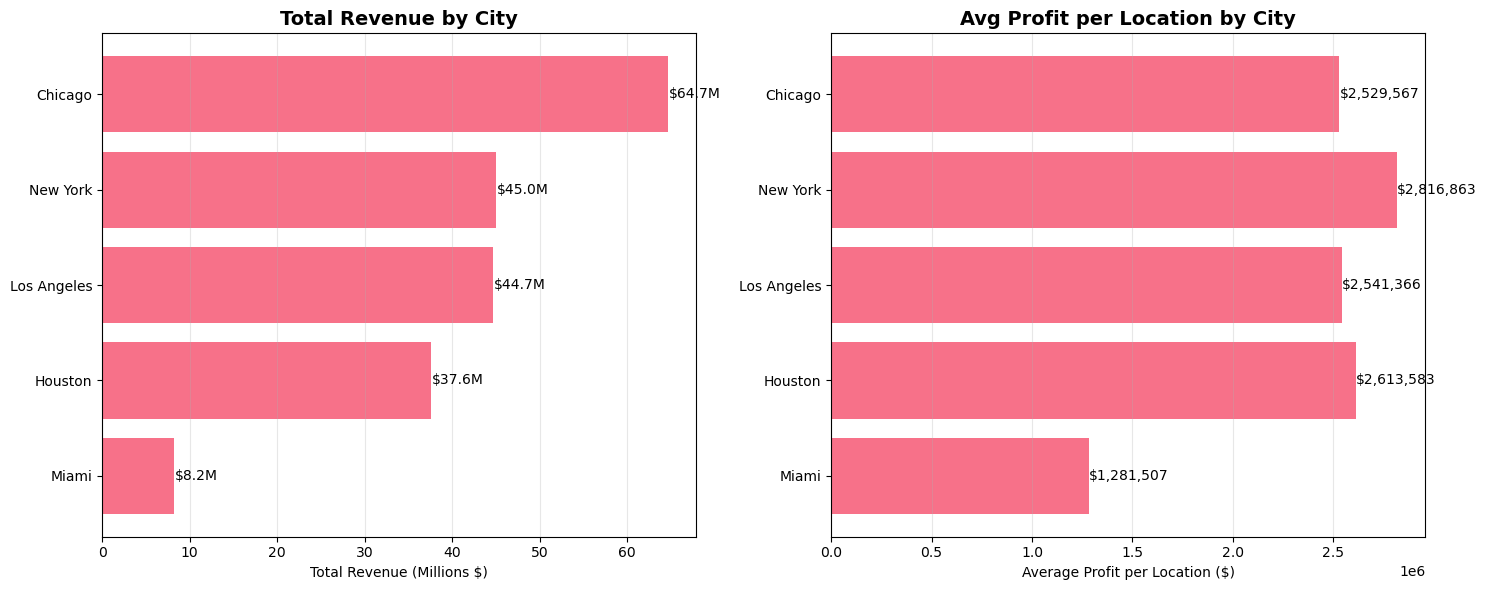

In [3]:
# VISUALIZATION 1: City Performance Comparison
print("\nCreating City Performance Chart...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Revenue by city
city_performance_sorted = city_performance.sort_values('total_revenue', ascending=True)
bars1 = ax1.barh(city_performance_sorted['city'], city_performance_sorted['total_revenue']/1000000)
ax1.set_xlabel('Total Revenue (Millions $)')
ax1.set_title('Total Revenue by City', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'${width:.1f}M', ha='left', va='center')

# Average profit per location by city
bars2 = ax2.barh(city_performance_sorted['city'], city_performance_sorted['avg_profit_per_location'])
ax2.set_xlabel('Average Profit per Location ($)')
ax2.set_title('Avg Profit per Location by City', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 1000, bar.get_y() + bar.get_height()/2, 
             f'${width:,.0f}', ha='left', va='center')

plt.tight_layout()
plt.savefig('city_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


Creating Seasonal Performance Chart...


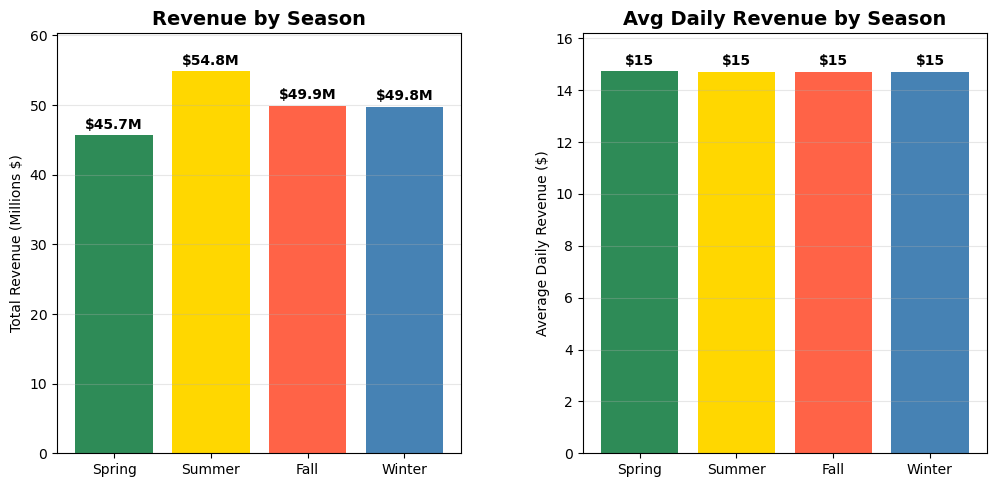

In [5]:
# VISUALIZATION 2: Seasonal Performance Trends
print("\nCreating Seasonal Performance Chart...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # no constrained_layout

# Revenue by season
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_ordered = seasonal_performance.set_index('season').reindex(season_order).reset_index()

colors = ['#2E8B57', '#FFD700', '#FF6347', '#4682B4']
bars1 = ax1.bar(seasonal_ordered['season'], seasonal_ordered['total_revenue']/1000000, color=colors)
ax1.set_ylabel('Total Revenue (Millions $)')
ax1.set_title('Revenue by Season', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels closer to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height * 1.01,   # <-- relative placement
             f'${height:.1f}M', ha='center', va='bottom', fontweight='bold')

ax1.set_ylim(0, max(seasonal_ordered['total_revenue']/1000000) * 1.1)  # tighter y-limit

# Average daily revenue by season
bars2 = ax2.bar(seasonal_ordered['season'], seasonal_ordered['avg_daily_revenue'], color=colors)
ax2.set_ylabel('Average Daily Revenue ($)')
ax2.set_title('Avg Daily Revenue by Season', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels closer to bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height * 1.01, 
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

ax2.set_ylim(0, max(seasonal_ordered['avg_daily_revenue']) * 1.1)

# Adjust spacing manually
plt.subplots_adjust(top=0.85, bottom=0.15, wspace=0.3)

# Save normally
plt.savefig('seasonal_performance_analysis.png', dpi=300)
plt.show()


🍽️ Creating Menu Performance Matrix...


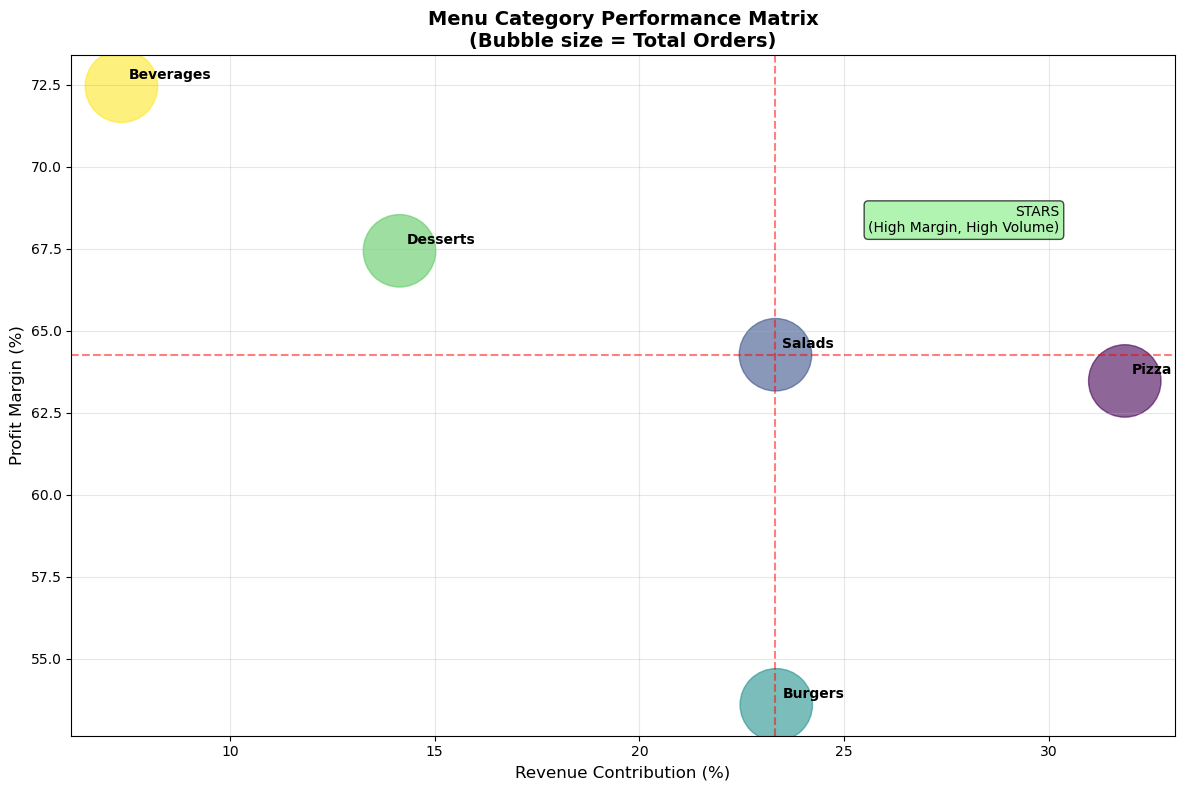

In [9]:
# VISUALIZATION 3: Menu Category Performance Matrix
print("\nCreating Menu Performance Matrix...")
fig, ax = plt.subplots(figsize=(12, 8))

# Create bubble chart: x=revenue contribution, y=profit margin, size=total orders
x = menu_mix['revenue_contribution_percent']
y = menu_mix['profit_margin_percent']
sizes = menu_mix['total_orders'] / 1000  # Scale down for better visibility

scatter = ax.scatter(x, y, s=sizes, alpha=0.6, c=range(len(menu_mix)), cmap='viridis')

# Add category labels
for i, category in enumerate(menu_mix['category']):
    ax.annotate(category, (x.iloc[i], y.iloc[i]), xytext=(5, 5), 
                textcoords='offset points', fontweight='bold')

ax.set_xlabel('Revenue Contribution (%)', fontsize=12)
ax.set_ylabel('Profit Margin (%)', fontsize=12)
ax.set_title('Menu Category Performance Matrix\n(Bubble size = Total Orders)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add quadrant lines
ax.axhline(y=y.median(), color='red', linestyle='--', alpha=0.5)
ax.axvline(x=x.median(), color='red', linestyle='--', alpha=0.5)

# Add quadrant labels
ax.text(0.95*x.max(), 0.95*y.max(), 'STARS\n(High Margin, High Volume)', 
        ha='right', va='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig('menu_performance_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


Creating Location Rent vs Performance Chart...


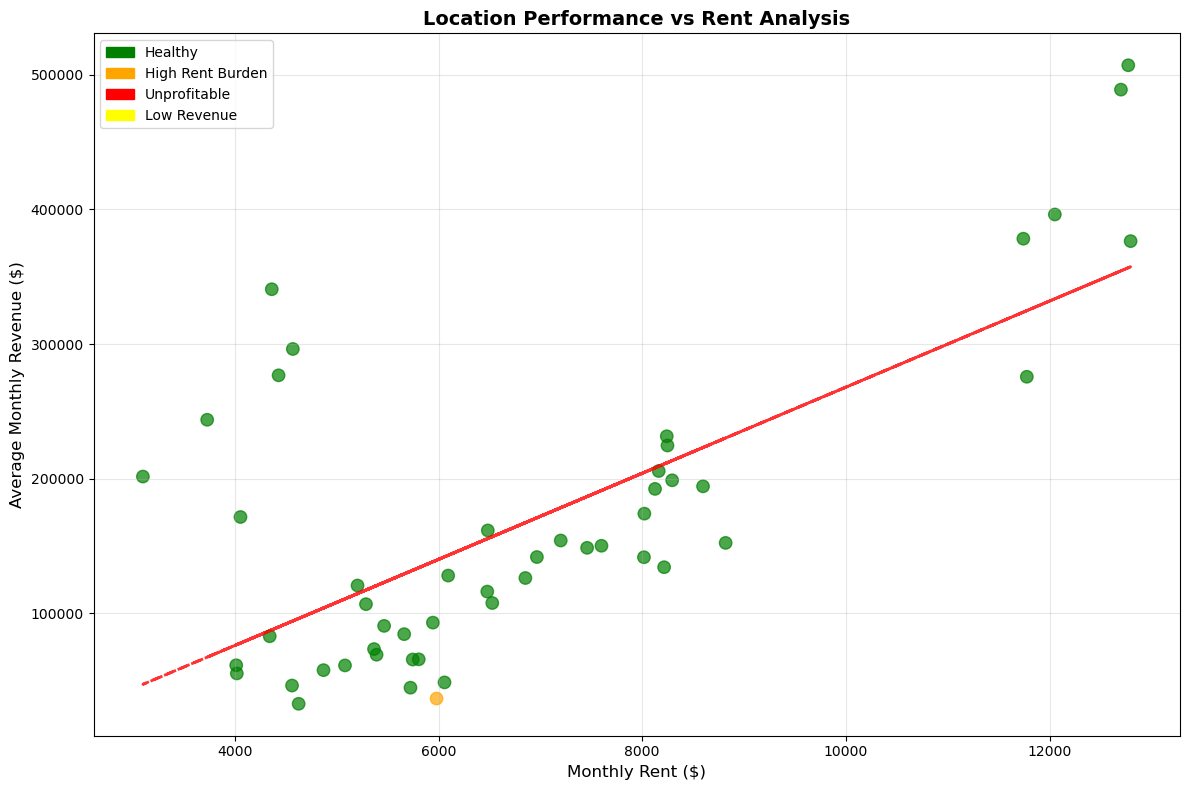

In [11]:
# VISUALIZATION 4: Location Performance vs Rent Analysis
print("\nCreating Location Rent vs Performance Chart...")
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot: Monthly rent vs Average monthly revenue
x = cost_analysis['monthly_rent']
y = cost_analysis['avg_monthly_revenue']
colors = cost_analysis['cost_status'].map({
    'Healthy': 'green',
    'High Rent Burden': 'orange', 
    'Unprofitable': 'red',
    'Low Revenue': 'yellow'
})

scatter = ax.scatter(x, y, c=colors, alpha=0.7, s=80)

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x), "r--", alpha=0.8, linewidth=2)

ax.set_xlabel('Monthly Rent ($)', fontsize=12)
ax.set_ylabel('Average Monthly Revenue ($)', fontsize=12)
ax.set_title('Location Performance vs Rent Analysis', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Create custom legend
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(color='green', label='Healthy'),
    mpatches.Patch(color='orange', label='High Rent Burden'),
    mpatches.Patch(color='red', label='Unprofitable'),
    mpatches.Patch(color='yellow', label='Low Revenue')
]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.savefig('rent_vs_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


Creating Weather Impact Chart...


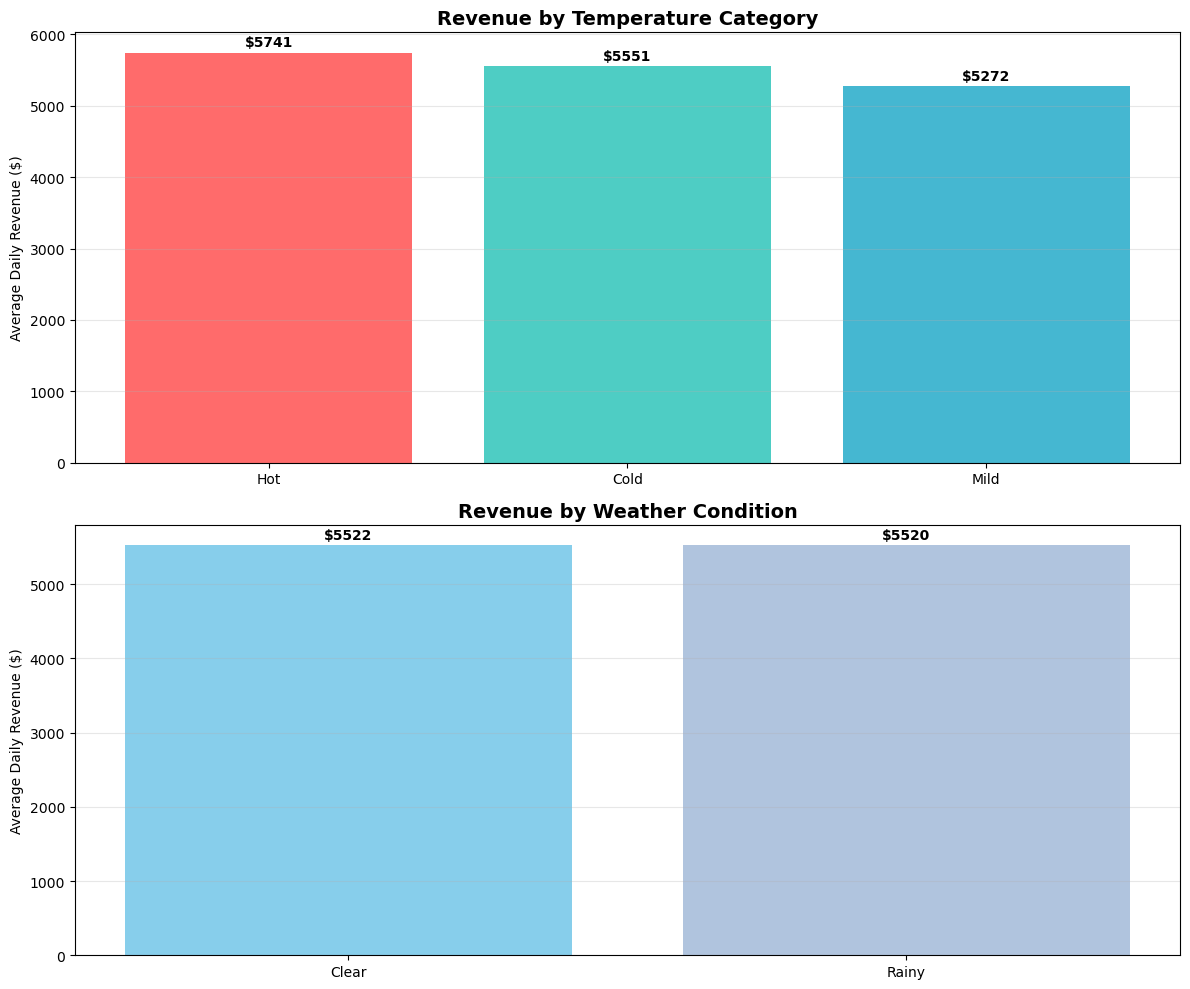


Creating Business Summary Dashboard...


In [13]:
# VISUALIZATION 5: Weather Impact Analysis
print("\nCreating Weather Impact Chart...")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Temperature impact
temp_data = weather_impact.groupby('temp_category')['avg_daily_revenue'].mean().sort_values(ascending=False)
bars1 = ax1.bar(temp_data.index, temp_data.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_ylabel('Average Daily Revenue ($)')
ax1.set_title('Revenue by Temperature Category', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 50, 
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

# Rain impact
rain_data = weather_impact.groupby('weather_condition')['avg_daily_revenue'].mean()
bars2 = ax2.bar(rain_data.index, rain_data.values, color=['#87CEEB', '#B0C4DE'])
ax2.set_ylabel('Average Daily Revenue ($)')
ax2.set_title('Revenue by Weather Condition', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 50, 
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('weather_impact_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCreating Business Summary Dashboard...")

Creating ChainEats Executive Dashboard


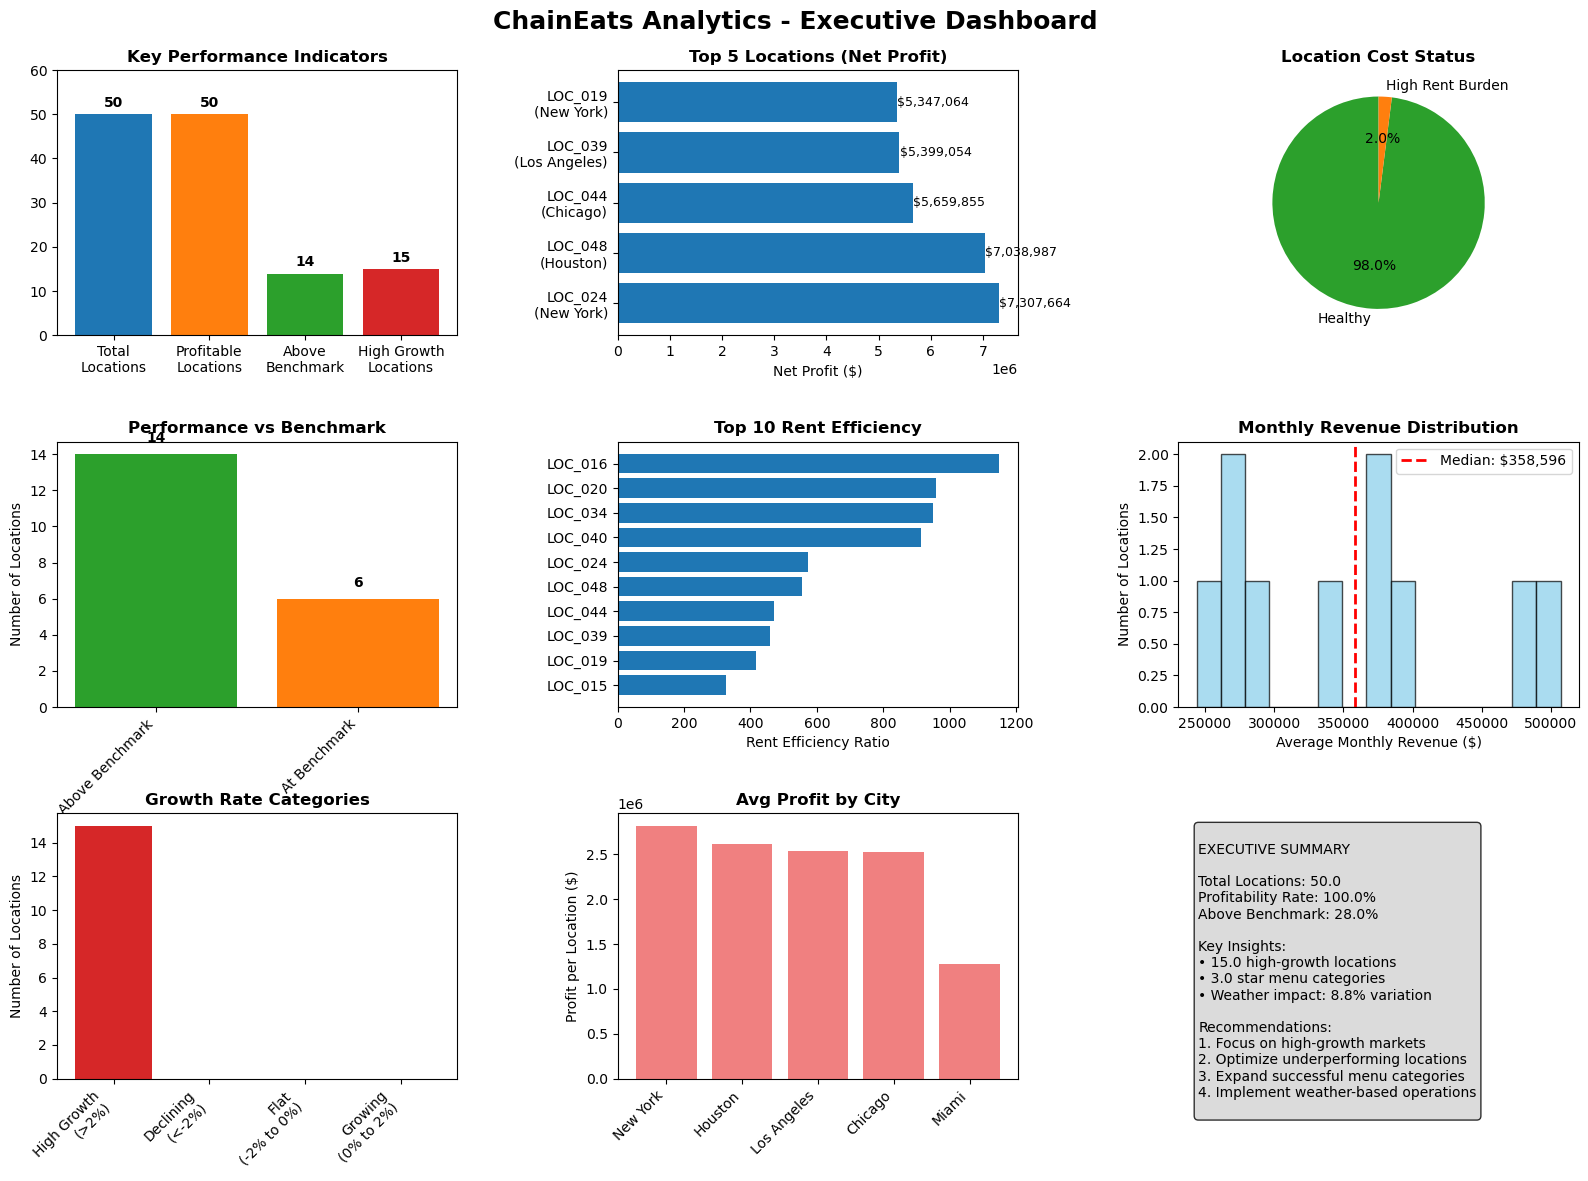


VISUALIZATION SUMMARY
Charts Created:
  1. city_performance_analysis.png
  2. seasonal_performance_analysis.png
  3. menu_performance_matrix.png
  4. rent_vs_performance_analysis.png
  5. weather_impact_analysis.png
  6. executive_dashboard.png

Key Visual Insights:
Cities show clear performance differences
Seasonal patterns reveal optimization opportunities
Menu categories positioned in performance matrix
Rent vs revenue correlation identified
Weather impact quantified for operations
Executive dashboard provides comprehensive overview

Day 5 Complete! Visualizations ready for presentation.


In [3]:
# ChainEats Analytics - Day 5: Executive Dashboard
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Creating ChainEats Executive Dashboard")
print("=" * 50)

# Load key data
top_locations = pd.read_csv('top_locations.csv')
executive_metrics = pd.read_csv('executive_summary_metrics.csv')
cost_analysis = pd.read_csv('cost_optimization.csv')
benchmarking = pd.read_csv('performance_benchmarking.csv')

# Create comprehensive executive dashboard
fig = plt.figure(figsize=(16, 12))

# Define color scheme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# DASHBOARD PANEL 1: Key Performance Indicators
ax1 = plt.subplot(3, 3, 1)
metrics_data = executive_metrics.iloc[0]

kpi_names = ['Total\nLocations', 'Profitable\nLocations', 'Above\nBenchmark', 'High Growth\nLocations']
kpi_values = [
    metrics_data['total_locations'], 
    metrics_data['profitable_locations'],
    metrics_data['locations_above_benchmark'], 
    metrics_data['high_growth_locations']
]

bars = ax1.bar(kpi_names, kpi_values, color=colors[:4])
ax1.set_title('Key Performance Indicators', fontweight='bold', fontsize=12)
ax1.set_ylim(0, max(kpi_values) * 1.2)

# Add value labels
for bar, value in zip(bars, kpi_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 1, 
             f'{int(value)}', ha='center', va='bottom', fontweight='bold')

# DASHBOARD PANEL 2: Top 5 Locations by Net Profit
ax2 = plt.subplot(3, 3, 2)
top_5_locations = top_locations.head(5)
bars = ax2.barh(range(len(top_5_locations)), top_5_locations['total_net_profit'])
ax2.set_yticks(range(len(top_5_locations)))
ax2.set_yticklabels([f"{row['location_id']}\n({row['city']})" for _, row in top_5_locations.iterrows()])
ax2.set_xlabel('Net Profit ($)')
ax2.set_title('Top 5 Locations (Net Profit)', fontweight='bold', fontsize=12)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 2000, bar.get_y() + bar.get_height()/2, 
             f'${width:,.0f}', ha='left', va='center', fontsize=9)

# DASHBOARD PANEL 3: Cost Status Distribution
ax3 = plt.subplot(3, 3, 3)
cost_status_counts = cost_analysis['cost_status'].value_counts()
colors_pie = ['#2ca02c', '#ff7f0e', '#d62728', '#ffff00']
wedges, texts, autotexts = ax3.pie(cost_status_counts.values, labels=cost_status_counts.index, 
                                   autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax3.set_title('Location Cost Status', fontweight='bold', fontsize=12)

# DASHBOARD PANEL 4: Performance Benchmark Distribution
ax4 = plt.subplot(3, 3, 4)
benchmark_counts = benchmarking['performance_category'].value_counts()
bars = ax4.bar(benchmark_counts.index, benchmark_counts.values, color=['#2ca02c', '#ff7f0e', '#d62728'])
ax4.set_title('Performance vs Benchmark', fontweight='bold', fontsize=12)
ax4.set_ylabel('Number of Locations')
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# DASHBOARD PANEL 5: Revenue vs Rent Efficiency
ax5 = plt.subplot(3, 3, 5)
top_10_rent_efficiency = top_locations.head(10).sort_values('rent_efficiency_ratio', ascending=True)
bars = ax5.barh(range(len(top_10_rent_efficiency)), top_10_rent_efficiency['rent_efficiency_ratio'])
ax5.set_yticks(range(len(top_10_rent_efficiency)))
ax5.set_yticklabels([f"{row['location_id']}" for _, row in top_10_rent_efficiency.iterrows()])
ax5.set_xlabel('Rent Efficiency Ratio')
ax5.set_title('Top 10 Rent Efficiency', fontweight='bold', fontsize=12)

# DASHBOARD PANEL 6: Monthly Revenue Distribution
ax6 = plt.subplot(3, 3, 6)
monthly_revenues = top_locations['avg_monthly_revenue']
ax6.hist(monthly_revenues, bins=15, color='skyblue', alpha=0.7, edgecolor='black')
ax6.axvline(monthly_revenues.median(), color='red', linestyle='--', linewidth=2, label=f'Median: ${monthly_revenues.median():,.0f}')
ax6.set_xlabel('Average Monthly Revenue ($)')
ax6.set_ylabel('Number of Locations')
ax6.set_title('Monthly Revenue Distribution', fontweight='bold', fontsize=12)
ax6.legend()

# DASHBOARD PANEL 7: Growth Rate Analysis
ax7 = plt.subplot(3, 3, 7)
growth_data = pd.read_csv('growth_analysis.csv')
growth_categories = pd.cut(growth_data['avg_growth_rate_percent'], 
                          bins=[-float('inf'), -2, 0, 2, float('inf')], 
                          labels=['Declining\n(<-2%)', 'Flat\n(-2% to 0%)', 'Growing\n(0% to 2%)', 'High Growth\n(>2%)'])
growth_counts = growth_categories.value_counts()
bars = ax7.bar(growth_counts.index, growth_counts.values, color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4'])
ax7.set_title('Growth Rate Categories', fontweight='bold', fontsize=12)
ax7.set_ylabel('Number of Locations')
plt.setp(ax7.get_xticklabels(), rotation=45, ha='right')

# DASHBOARD PANEL 8: City Performance Summary
ax8 = plt.subplot(3, 3, 8)
city_perf = pd.read_csv('city_performance.csv')
bars = ax8.bar(city_perf['city'], city_perf['avg_profit_per_location'], color='lightcoral')
ax8.set_title('Avg Profit by City', fontweight='bold', fontsize=12)
ax8.set_ylabel('Profit per Location ($)')
plt.setp(ax8.get_xticklabels(), rotation=45, ha='right')

# DASHBOARD PANEL 9: Executive Summary Text
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

# Calculate key insights
profitability_rate = (metrics_data['profitable_locations'] / metrics_data['total_locations']) * 100
benchmark_rate = (metrics_data['locations_above_benchmark'] / metrics_data['total_locations']) * 100

summary_text = f"""
EXECUTIVE SUMMARY

Total Locations: {metrics_data['total_locations']}
Profitability Rate: {profitability_rate:.1f}%
Above Benchmark: {benchmark_rate:.1f}%

Key Insights:
• {metrics_data['high_growth_locations']} high-growth locations
• {metrics_data['star_menu_categories']} star menu categories
• Weather impact: {metrics_data['weather_revenue_impact_percent']}% variation

Recommendations:
1. Focus on high-growth markets
2. Optimize underperforming locations
3. Expand successful menu categories
4. Implement weather-based operations
"""

ax9.text(0.05, 0.95, summary_text, transform=ax9.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

# Overall dashboard styling
plt.suptitle('ChainEats Analytics - Executive Dashboard', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.4)

# Save dashboard
plt.savefig('executive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# Create visualization summary
print("\nVISUALIZATION SUMMARY")
print("=" * 50)
print("Charts Created:")
print("  1. city_performance_analysis.png")
print("  2. seasonal_performance_analysis.png")
print("  3. menu_performance_matrix.png")
print("  4. rent_vs_performance_analysis.png")
print("  5. weather_impact_analysis.png")
print("  6. executive_dashboard.png")

print("\nKey Visual Insights:")
print("Cities show clear performance differences")
print("Seasonal patterns reveal optimization opportunities")
print("Menu categories positioned in performance matrix")
print("Rent vs revenue correlation identified")
print("Weather impact quantified for operations")
print("Executive dashboard provides comprehensive overview")

print("\nComplete! Visualizations ready for presentation.")